In [40]:
import nltk
from nltk.corpus import brown

import string

from sklearn.decomposition import PCA

import gensim
from gensim.models import Word2Vec, FastText

import matplotlib.pyplot as plt

## Load data

In [3]:
nltk.download('brown')

[nltk_data] Downloading package brown to /home/falcon/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [4]:
document = brown.sents()

In [5]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

## Preprocessing

### Text Cleaning

In [8]:
cleaned_doc = []
for doc in document:
    new_doc = []
    for word in doc:
        if word not in string.punctuation:
            new_doc.append(word.lower())

    if len(new_doc) > 0:
        cleaned_doc.append(new_doc)

In [9]:
len(cleaned_doc)

57219

### Word2vec (skip-gram)

In [12]:
model = Word2Vec(
    min_count=10,
    window=2,
    vector_size=300,
    negative=10,
    sg=1)

In [13]:
model.build_vocab(cleaned_doc)

In [14]:
model.train(cleaned_doc, total_examples=model.corpus_count, epochs=30, report_delay=1)

(20543373, 31031340)

In [15]:
model.wv.most_similar(positive=['car'])

[('tent', 0.40494540333747864),
 ('cab', 0.39138278365135193),
 ('parked', 0.37155020236968994),
 ('fork', 0.36062654852867126),
 ('curb', 0.360582560300827),
 ('mexicans', 0.3574865758419037),
 ('shayne', 0.3564433157444),
 ('elevator', 0.35202914476394653),
 ('cars', 0.35082393884658813),
 ('plymouth', 0.34948647022247314)]

In [58]:
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

In [60]:
def show_neighbors(model, words: list):
    X = model.wv[words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.figure(figsize=(10, 4), dpi=200)
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

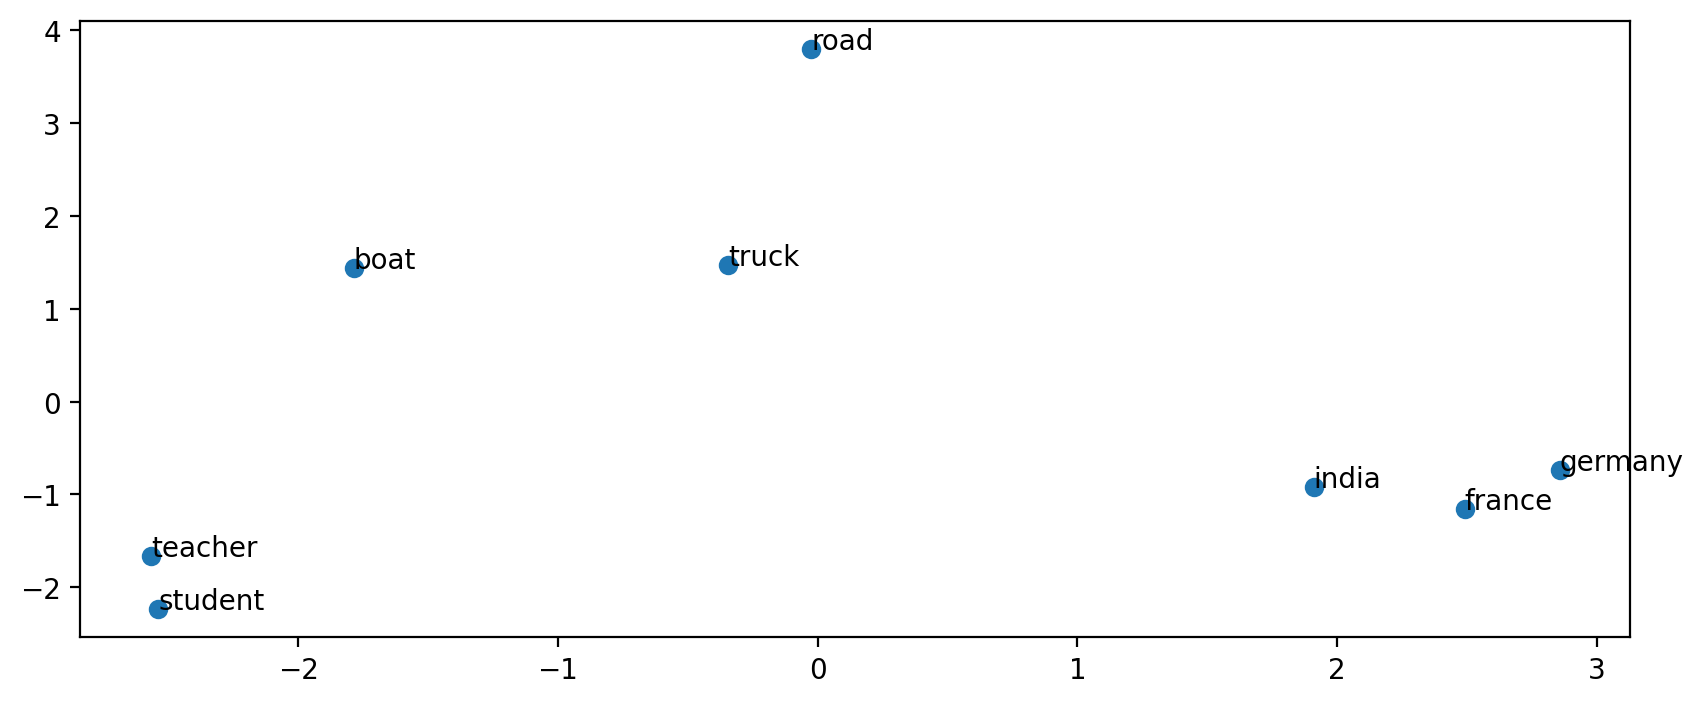

In [62]:
show_neighbors(model, words)

In [82]:
def get_similar_words(model, word="speed", cnt=3):
    print(f"{cnt} words similar to {word}")
    words = model.wv.most_similar(word, topn=cnt)
    for word in words:
        print(word)
    print()

In [88]:
get_similar_words(model, 'children', 5)

5 words similar to children
('child', 0.39730072021484375)
('wives', 0.3690342605113983)
('psychologists', 0.36364224553108215)
('handicapped', 0.3604376018047333)
('compulsive', 0.35874828696250916)



## FastText

In [43]:
fastText_model = FastText(vector_size=300)

In [47]:
fastText_model.build_vocab(cleaned_doc)

In [52]:
fastText_model.train(cleaned_doc, epochs=30, total_examples=fastText_model.corpus_count, report_delay=1)

(21782290, 31031340)

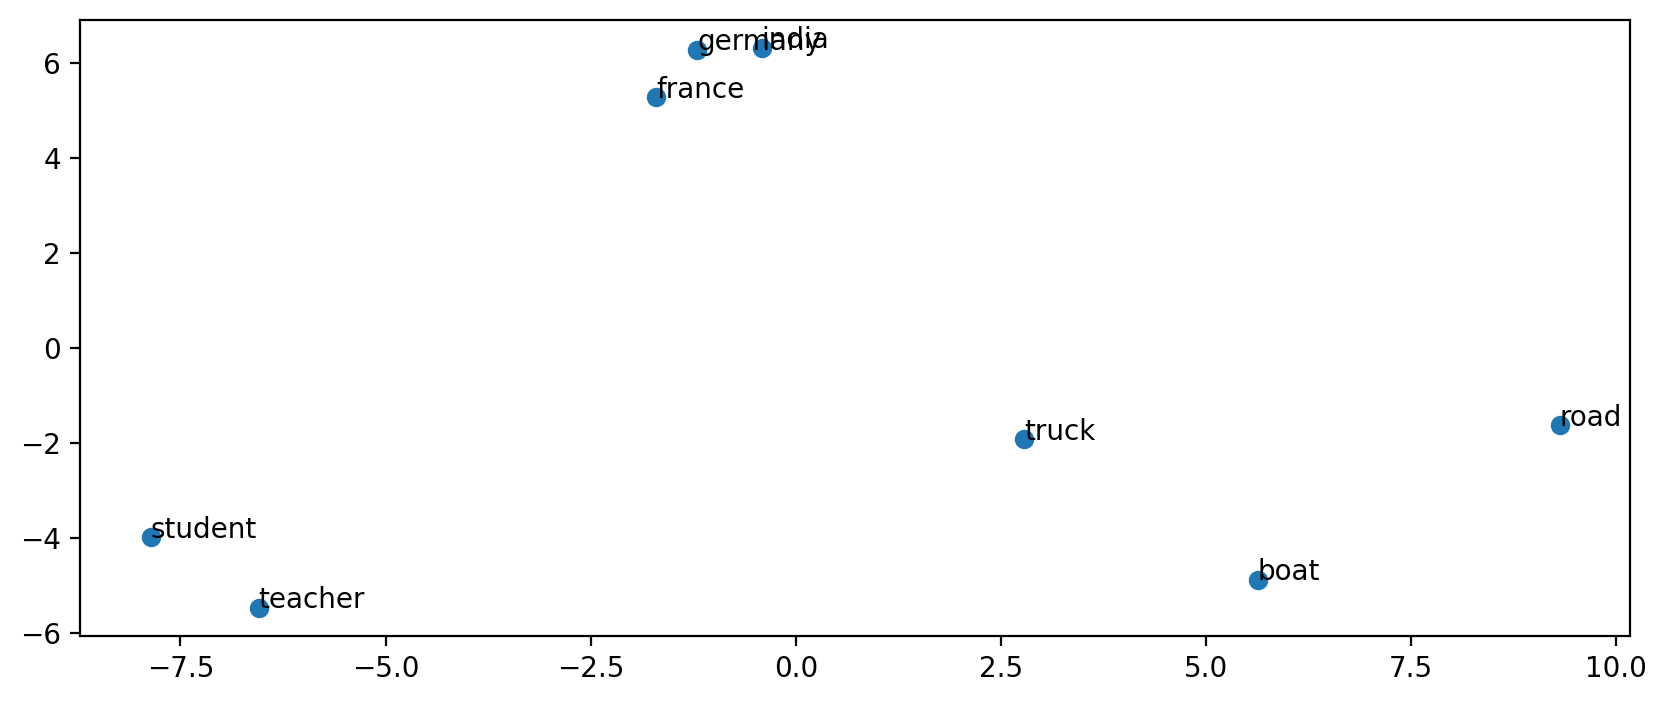

In [64]:
show_neighbors(fastText_model, words)

In [90]:
get_similar_words(fastText_model, "children", 5)

5 words similar to children
('grandchildren', 0.954319417476654)
("children's", 0.8863855004310608)
('chili', 0.7987030744552612)
('childish', 0.7941708564758301)
('child', 0.7836630344390869)

